In [1]:
using Random, Distributions
using LinearAlgebra
using Plots

file = open("data.txt", "r");
s = read(file, String);
close(file);

data = reshape(parse.(Float64, split(s)),(2,30))';
x = data[:,1]
y = data[:,2]
theta = rand(Uniform(-1,1), (4,1))
Kmax = 300;
lambda = 1e-4;

In [2]:
function f(theta, x)
    return theta[1].*exp.(theta[2].*x) + theta[3].*cos.(x) .+ theta[4]
end
function df(theta, x)
    D = zeros((30,4))
    D[:,1] = exp.(theta[2].*x)
    D[:,2] = theta[1].*x.*exp.(theta[2].*x)
    D[:,3] .= cos.(x)
    D[:,4] .= 1
    return D
end
function LM_loss(x,y,theta)
   return norm(f(theta, x).-y)^2 
end

LM_loss (generic function with 1 method)

In [3]:
loss_value = zeros(Kmax);
for i =1:Kmax
    D = df(theta, x)
    theta = theta .- (transpose(D) * D + lambda * I) \ (transpose(D)*(f(theta, x).-y))
    loss_value[i] = LM_loss(x,y,theta) + lambda * norm(theta)^2
end

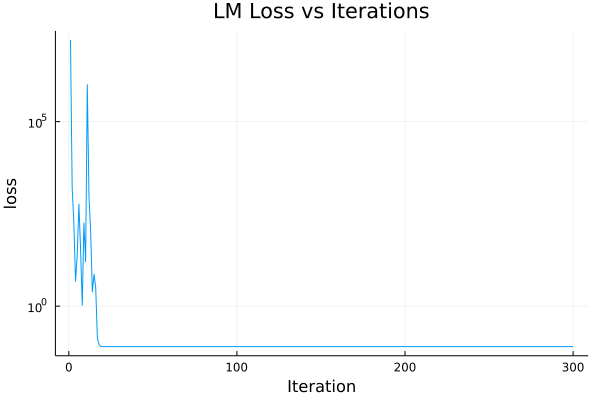

In [4]:
plot(1:Kmax, loss_value,
    yaxis=:log,
    xlabel = "Iteration",
    ylabel = "loss",
    title = "LM Loss vs Iterations",
    legend = false,
    grid = true)

In [5]:
println("Final Result:")
println("Theta 1 is " * string(theta[1]))
println("Theta 2 is " * string(theta[2]))
println("Theta 3 is " * string(theta[3]))
println("Theta 4 is " * string(theta[4]))

Final Result:
Theta 1 is -1.2616563948328474
Theta 2 is 0.24546488429074348
Theta 3 is 0.7341270658054025
Theta 4 is 1.2262608483148272


In [6]:
plot(x, y, seriestype = :scatter, label="Scatter Data")
t = minimum(x):0.01:maximum(x)
plot!(t,f(theta, t),label = "Fitted Curve")
plot!(xlabel = "X", ylabel = "Y", title = "Least squares regression",grid = true)
savefig("plot1.png")